In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gait = pd.read_csv("gaitFull.csv")

In [3]:
gait

,P1,P2,P3,P4,x1,y1,z1,x2,y2,z2,r,label
0,0,0,1,1,-0.29,-9.70,3.97,0.08,-9.31,0.27,161,0
1,0,0,1,1,0.05,-9.51,4.45,0.27,-9.05,-0.67,151,0
2,0,0,1,1,0.78,-9.48,6.54,1.96,-8.99,2.08,146,1
3,0,0,1,1,5.77,-6.85,3.06,-0.24,-8.95,6.86,144,1
4,0,0,1,1,0.45,-9.52,-0.36,0.39,-9.85,2.25,143,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,1,1,0,0,-5.31,-10.97,-6.63,-1.89,-10.10,-3.29,288,5
2372,1,1,0,0,-0.86,-9.70,-1.71,-3.69,-9.92,-2.17,276,5
2373,1,1,0,0,-0.79,-10.07,-3.23,-1.73,-9.16,1.32,251,5
2374,1,1,0,0,0.31,-10.10,3.14,3.06,-8.72,-0.20,209,6


In [4]:
X = gait.drop('label',  axis=1)
y = gait['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [1000],  
              'gamma': [ 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.519, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.490, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.518, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1000], 'gamma': [0.0001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [7]:
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [8]:
grid_predictions=grid.predict(X_test)

In [9]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.46      0.57      0.51        69
           1       0.52      0.66      0.58        41
           2       0.49      0.43      0.46        65
           3       0.59      0.34      0.43        58
           4       0.57      0.53      0.55        62
           5       0.45      0.52      0.49        63
           6       0.46      0.66      0.54        58
           7       0.49      0.28      0.36        60

    accuracy                           0.49       476
   macro avg       0.50      0.50      0.49       476
weighted avg       0.50      0.49      0.49       476



In [10]:
print(confusion_matrix(y_test, grid_predictions))

[[39  4  1  2  1 11  1 10]
 [ 3 27  2  0  0  5  4  0]
 [ 8 11 28  2  1  2  9  4]
 [ 6  3 13 20  6  4  3  3]
 [ 6  3  3  8 33  7  1  1]
 [ 6  3  1  0 13 33  7  0]
 [ 2  1  5  1  2  9 38  0]
 [15  0  4  1  2  2 19 17]]


In [11]:
d=confusion_matrix(y_test, grid_predictions)

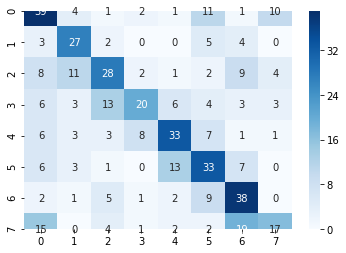

In [13]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d)
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

In [28]:
gait = pd.read_csv("gaitFullModified2.csv")

In [29]:
X = gait.drop('label',  axis=1)
y = gait['label']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [31]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [1000],  
              'gamma': [0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.669, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.701, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.657, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1000], 'gamma': [0.0001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

print(grid.best_estimator_) 

In [33]:
grid_predictions=grid.predict(X_test)

In [34]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           1       0.44      0.50      0.47        54
           2       0.72      0.76      0.74       186
           3       0.70      0.56      0.62        68
           4       0.71      0.68      0.70       168

    accuracy                           0.68       476
   macro avg       0.64      0.63      0.63       476
weighted avg       0.68      0.68      0.68       476



In [35]:
print(confusion_matrix(y_test, grid_predictions))

[[ 27  15   0  12]
 [ 14 142   4  26]
 [  7  14  38   9]
 [ 14  27  12 115]]


In [55]:
d=[[ 27 ,15  , 0  ,12],
 [ 14 ,142 ,  4,  26],
 [  7,  14,  38  , 9],
 [ 14 , 27,  12, 115]]

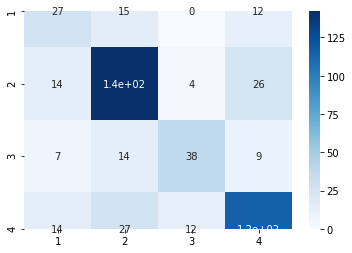

In [57]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(d, index = [i for i in "1234"],
              columns = [i for i in "1234"])
plt.figure()
sn.heatmap(df_cm, annot=True,cmap="Blues")

In [64]:
nodes= [3,8,6,7,2]
out=[]
for k in range(len(nodes)):
        out.append(nodes[-k])
print(out)

[3, 2, 7, 6, 8]


In [66]:
num = 15
def increment(num):
    num = num + 2

increment(10)
print(num)

15
